[0.05660671 6.66865962 1.90727673 0.        ]


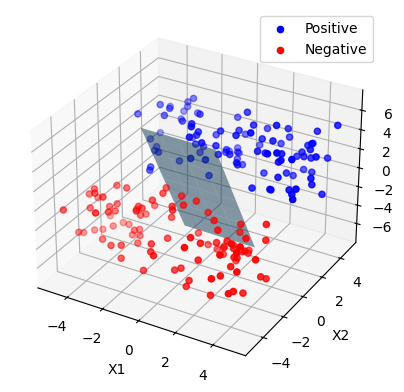

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
data = pd.read_csv('lab02_dataset_1.csv')

# Extract features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Add bias term
X = np.c_[X, np.ones(X.shape[0])]

def my_perceptron(X, y, threshold=0.01, max_iter=1000):
    # Initialize weights
    w = np.zeros(X.shape[1])
    
    misclassified = 1
    iter_count = 0
    
    while misclassified > threshold and iter_count < max_iter:
        misclassified = 0
        for i in range(len(X)):
            if (np.dot(X[i], w) > 0) != (y[i] > 0):
                misclassified += 1
                w += y[i] * X[i]
        misclassified /= len(X)
        iter_count += 1
    
    return w

# Train perceptron
weight_vector = my_perceptron(X, np.where(y == 'Positive', 1, -1), threshold=0.01)
print(weight_vector)
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points
ax.scatter(X[y == 'Positive'][:, 0], X[y == 'Positive'][:, 1], X[y == 'Positive'][:, 2], c='blue', label='Positive')
ax.scatter(X[y == 'Negative'][:, 0], X[y == 'Negative'][:, 1], X[y == 'Negative'][:, 2], c='red', label='Negative')

# Create mesh grid to plot separator plane
x_plane, y_plane = np.meshgrid(range(-2, 3), range(-2, 3))
z_plane = (-weight_vector[0]*x_plane - weight_vector[1]*y_plane - weight_vector[3]) / weight_vector[2]

# Plot separator plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.legend()
plt.show()


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OrdinalEncoder

def my_perceptron(data, max_iterations=1000):
    
    features = data.iloc[:, :-1].values 
    labels = data.iloc[:, -1].values
    weights = [0.0, 0.0, 0.0]  # Initialize weights with zeros

    for _ in range(max_iterations):
        misclassified = 0
        for i in range(len(features)):
            y_hat = 1 if (weights[0] + features[i, 0] * weights[1] + features[i, 1] * weights[2]) >= 0 else -1
            if y_hat != labels[i]:
                misclassified += 1
                weights[0] += labels[i]
                weights[1] += labels[i] * features[i, 0]
                weights[2] += labels[i] * features[i, 1]

        misclassification_rate = misclassified / len(features)
        if misclassification_rate < 0.01:
            return weights

    return weights

# Load the dataset
data = pd.read_csv("lab02_dataset_1.csv")

classUnique = list(np.asarray(data['Class'].unique()))
classEncoder = OrdinalEncoder(categories=[list(classUnique)])
data['Class'] = classEncoder.fit_transform(data[['Class']])

# Apply perceptron algorithm
weights = my_perceptron(data)

print(weights)


[0.0, 0.0, 0.0]


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def my_perceptron(dataset, threshold=0.01, max_iterations=1000):
    # Load the dataset
    data = pd.read_csv(dataset)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    
    # Add a column of ones to X for the bias term
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    
    # Initialize the weight vector
    w = np.zeros(X.shape[1])
    
    # Iterate until convergence or maximum iterations reached
    iterations = 0
    misclassified = True
    while misclassified and iterations < max_iterations:
        misclassified = False
        for i in range(X.shape[0]):
            if np.dot(X[i], w) <= 0:
                w += X[i]
                misclassified = True
        iterations += 1
    
    return w

# Function to plot the dataset and linear separator
def plot_dataset_with_separator(dataset, w):
    # Load the dataset
    data = pd.read_csv(dataset)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    
    # Add a column of ones to X for the bias term
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    
    # Create a meshgrid to plot the linear separator
    x1_min, x1_max = np.min(X[:, 1]), np.max(X[:, 1])
    x2_min, x2_max = np.min(X[:, 2]), np.max(X[:, 2])
    x1_range = np.linspace(x1_min, x1_max, 10)
    x2_range = np.linspace(x2_min, x2_max, 10)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    X1_flat = X1.flatten()
    X2_flat = X2.flatten()
    X_mesh = np.column_stack((np.ones(X1_flat.shape), X1_flat, X2_flat))
    
    # Compute the predicted class labels for the meshgrid
    y_pred = np.sign(np.dot(X_mesh, w))
    
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the data points
    ax.scatter(X[:, 1], X[:, 2], X[:, 3], c=y, cmap='coolwarm', label='Data Points')
    
    # Plot the linear separator
    ax.plot_trisurf(X1_flat, X2_flat, y_pred, alpha=0.5, cmap='coolwarm', label='Linear Separator')
    
    # Set labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('Dataset with Linear Separator')
    
    # Set legend
    ax.legend()
    
    # Show the plot
    plt.show()

# Usage example
dataset = 'lab02_dataset_1.csv'
w = my_perceptron(dataset, threshold=0.01)
plot_dataset_with_separator(dataset, w)

ValueError: shapes (100,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U8'), dtype('bool')) -> None

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
df = pd.read_csv('lab02_dataset_1.csv')

classUnique = list(np.asarray(df['Class'].unique()))
classEncoder = OrdinalEncoder(categories=[list(classUnique)])
df['Class'] = classEncoder.fit_transform(df[['Class']])

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Perceptron learning
def my_perceptron(X, y):

    # Initialize weights
    w = np.zeros(X.shape[1])
    eta = 1
    errors = len(y)

    # Train until convergence 
    while errors/len(y) > 0.01:
        errors = 0
        for i, x in enumerate(X.values):
            pred = np.dot(x, w) >= 0
            if pred != y.iloc[i]: 
                errors += 1
                w += eta * (y.iloc[i] - pred) * x

    return w

# Get separator
w = my_perceptron(X, y)
print(w)
# print(w)

# # Plot data and boundary
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y)

# # Decision boundary
# x1 = np.linspace(-1, 1, 10)
# x2 = -(w[0]*x1 + w[2])/w[1]
# ax.plot(x1, x2, zs=0, zdir='z')

plt.show()

NameError: name 'OrdinalEncoder' is not defined

In [87]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('lab02_dataset_1.csv')  

classUnique = list(np.asarray(df['Class'].unique()))
classEncoder = OrdinalEncoder(categories=[list(classUnique)])
df['Class'] = classEncoder.fit_transform(df[['Class']])

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Perceptron learning 
def my_perceptron(X, y):

    # Initialize weights
    w = np.zeros(X.shape[1])  
    eta = 1
    
    # Track misclassifications
    errors = len(y)  
    
    # Train until convergence
    while errors/len(y) > 0.01:
        
        # Count misclassified examples
        errors = 0 
        
        for i, x in enumerate(X.values):
            pred = np.dot(x, w) >= 0
            if pred != y.iloc[i]:
                errors += 1
                w += eta * (y.iloc[i] - pred) * x

        print("Errors :",errors, " | errors/len(y) :", (errors/len(y)))
    return w

# X = np.array([[1, 2, 1] ,[1, -2, 1] ,[3, 1, 2], [2, 3, 2] ,[-1, 2, -2] ,[-1, -2, 4] ,[1, -3, -3] ,[-2, 4, -2] ,[4, 1, 3] ,[-1, 2, -4]])
# y = np.array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1])
# weights = my_perceptron(X, y)
# print(weights)

# X = np.array([[1, 2], [2, 3], [2, 1], [3, 0]])
# y = np.array([1, 1, 0, 0])

# # Convert arrays to DataFrames
# X_df = pd.DataFrame(X, columns=['feature1', 'feature2'])
# y_df = pd.DataFrame(y, columns=['label'])

# # Concatenate X and y DataFrames horizontally
# df = pd.concat([X_df, y_df], axis=1)

# X = pd.DataFrame({'X': X_df['feature1'], 'X':X_df['feature2']})
# y = pd.DataFrame({'Class': y_df['label']})

# print(df.head())
# weights = my_perceptron(X, y)
# print(weights)

print(y.head())
# Get weights vector
w = my_perceptron(X, y)
print(w)

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Class, dtype: float64
Errors : 2  | errors/len(y) : 0.01
[-0.73733843  3.09858631  3.81258893]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder 
from mpl_toolkits.mplot3d import Axes3D

# Function to implement perceptron algorithm
def my_perceptron(X, y, threshold=0.01, max_iter=1000):
    # Initialize weights to zeros
    w = np.zeros(X.shape[1])
    converged = False
    misclassified = 1
    
    # Convert class labels to -1 and 1
    y = np.where(y == 'Positive', 1, -1)
    
    # Perceptron algorithm
    iter = 0
    while not converged and iter < max_iter:
        misclassified = 0
        for i, x in enumerate(X):
            if y[i] * np.dot(x, w) <= 0:
                w += y[i] * x
                misclassified += 1
        if misclassified / len(X) < threshold:
            converged = True
        iter += 1
    
    return w


# Load dataset  
dataset = pd.read_csv('lab02_dataset_1.csv')

classUnique = list(np.asarray(dataset['Class'].unique()))
classEncoder = OrdinalEncoder(categories=[list(classUnique)])
dataset['Class'] = classEncoder.fit_transform(dataset[['Class']])
print(dataset.head())

X = dataset[['X', 'Y', 'Z']].values
y = dataset['Class'].values

weights = my_perceptron(X, y)
print(weights)

          X         Y         Z  Class
0 -2.153269 -1.910092 -2.089200    0.0
1  3.354634 -1.803199 -2.849789    0.0
2 -2.773528  4.644997  2.412375    1.0
3  2.890608 -1.188494 -1.723388    0.0
4 -3.416683  4.789795  3.157649    1.0
[-1.58344476  0.49505282  5.25653946]
